## **Assignment 3: Clustering and fitting**

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

### Data chosen: CO2 emissions (metric tons per capita)

Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.

Source: Climate Watch. 2020. GHG Emissions. Washington, DC: World Resources Institute. Available at: climatewatchdata.org/ghg-emissions. See SP.POP.TOTL for the denominator's source.

License:  Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) 

Aggregation Method: Weighted Average

### Reading the csv file

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('co2_per_capita.csv', skiprows = 4)

# Perform operations on the DataFrame
# For example, print the first few rows
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.031093,1.092216,1.125224,1.020760,0.802751,0.766143,0.779203,NaN,NaN,NaN


### Remove columns that are unnecessary

In [3]:
# Remove specific columns by column numbers
df = df.drop(df.columns[2:34], axis=1)
df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,0.936869,0.957668,...,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764,NaN,NaN,NaN
2,Afghanistan,AFG,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,0.068979,0.061837,...,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976,NaN,NaN,NaN
3,Africa Western and Central,AFW,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,0.559529,0.544999,...,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884,NaN,NaN,NaN
4,Angola,AGO,0.554586,0.545439,0.544627,0.710984,0.839398,0.914302,1.073463,1.086668,...,1.031093,1.092216,1.125224,1.020760,0.802751,0.766143,0.779203,NaN,NaN,NaN


In [4]:
df = df.drop(['2020','2021'], axis=1)
df = df.iloc[:, :-1]
df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,0.936869,0.957668,...,1.011807,0.970188,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764
2,Afghanistan,AFG,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,0.068979,0.061837,...,0.252220,0.305308,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976
3,Africa Western and Central,AFW,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,0.559529,0.544999,...,0.464419,0.468718,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884
4,Angola,AGO,0.554586,0.545439,0.544627,0.710984,0.839398,0.914302,1.073463,1.086668,...,0.975853,0.983960,0.947663,1.031093,1.092216,1.125224,1.020760,0.802751,0.766143,0.779203


### Drop null values

In [5]:
df = df.dropna()
df.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,AFE,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,0.936869,0.957668,...,1.011807,0.970188,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764
2,Afghanistan,AFG,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,0.068979,0.061837,...,0.252220,0.305308,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976
3,Africa Western and Central,AFW,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,0.559529,0.544999,...,0.464419,0.468718,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884
4,Angola,AGO,0.554586,0.545439,0.544627,0.710984,0.839398,0.914302,1.073463,1.086668,...,0.975853,0.983960,0.947663,1.031093,1.092216,1.125224,1.020760,0.802751,0.766143,0.779203
5,Albania,ALB,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,...,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248


### Clustering

In [19]:
# Extract the numerical columns representing the emissions for each year
emissions_columns = df.columns[2:]

# Step 2: Normalize the data
normalized_data = (df[emissions_columns] - df[emissions_columns].mean()) / df[emissions_columns].std()

# Step 3: Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
df['PC1'] = pca_data[:, 0]
df['PC2'] = pca_data[:, 1]

# Step 4: Apply k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(pca_data)

# Step 5: Assign cluster labels
df['Cluster'] = kmeans.labels_

# Step 6: Visualize the clusters using Plotly
fig = go.Figure()

for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    fig.add_trace(
        go.Scatter(
            x=cluster_data['PC1'],
            y=cluster_data['PC2'],
            mode='markers',
            name=f'Cluster {cluster}',
        )
    )

# Plot cluster centers
centers = kmeans.cluster_centers_
fig.add_trace(
    go.Scatter(
        x=centers[:, 0],
        y=centers[:, 1],
        mode='markers',
        marker=dict(color='black', symbol='x'),
        name='Cluster Centers',
    )
)

fig.update_layout(
    title='CO2 Emissions Clustering',
    xaxis_title='PC1',
    yaxis_title='PC2',
    showlegend=True,
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Fitting

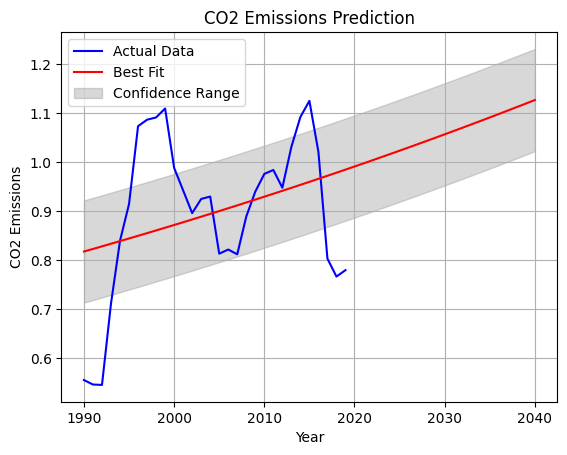

In [18]:
df_new = df.drop(['PC1','PC2','Cluster'], axis=1)

# Select the data for a specific country
country_data = df_new[df_new['Country Name'] == 'Angola']

# Extract the years and emissions values
years = np.arange(1990, 2020)
emissions = country_data.values[0, 2:]

# Define the exponential growth function
def exponential_growth(t, A, r):
    return A * np.exp(r * (t - years[0]))

# Fit the exponential growth function to the data
params, pcov = curve_fit(exponential_growth, years, emissions)

# Generate predictions for all years
all_years = np.arange(1990, 2041)
predicted_emissions = exponential_growth(all_years, *params)

# Adjust the length of emissions array
emissions = np.append(emissions, [np.nan] * (all_years.shape[0] - years.shape[0]))

# Calculate the standard error of the fitted parameters
perr = np.sqrt(np.diag(pcov))

# Calculate the confidence range
alpha = 0.05  # Significance level (95% confidence interval)
z_value = 1.96  # Z-value for a two-tailed test
lower_bound = predicted_emissions - z_value * np.max(perr)
upper_bound = predicted_emissions + z_value * np.max(perr)

# Plot the data, best fitting function, and confidence range
plt.plot(all_years, emissions, 'b-', label='Actual Data')
plt.plot(all_years, predicted_emissions, 'r-', label='Best Fit')
plt.fill_between(all_years, lower_bound, upper_bound, alpha=0.3, color='gray', label='Confidence Range')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Prediction')
plt.legend()
plt.grid(True)
plt.show()